In [2]:
import pandas as pd

In [26]:
#Problem-1(3.1)
#Reading the csv file
df = pd.read_csv("/content/drive/MyDrive/DataSets/bank .csv")
#Check info
df.info()

print("\n")

#Selecting columns of dtype objects
df.select_dtypes(include=['object']).columns

#Selecting the unique values of each column
for col in df:
  print("The uniques values of ",col,"=",df[col].unique(),"\n")

print("\n");

#Showing the total number of null values in each column
for col in df:
  print("The total number of null values in ",col,"=",df[col].isnull().sum(),"\n")

#Selecting all columns no objects
df_numeric = df.select_dtypes(exclude=['object'])
print("Columns with dtype object hace been excluded.")

print("\n")

#Storing the numerical data in a new csv file
numeric_csv_file = "banknumericdata.csv"
df_numeric.to_csv(numeric_csv_file, index=False)

#Load the new csv and print its summary
df_numeric_loaded = pd.read_csv(numeric_csv_file)
print(df_numeric_loaded.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The uniques values of  age = [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 3

In [22]:
#Problem-2(3.1)
#Reading the csv file
df_med = pd.read_csv("/content/drive/MyDrive/DataSets/medical_students_dataset.csv")
#Check info
df_med.info()

print("\n")

#Identifing columns with null values
df_med.isnull().sum()

#FIlling the missing values
for col in df_med.columns:
   #Check for missing values
   if df_med[col].isnull().sum() > 0:
    if df_med[col].dtype in ['float64']:
      #Fill with mean because it provides more accurate data by resloving the distorion of data
      df_med[col] = df_med[col].fillna(df_med[col].mean())
      print(f"Filled missing values in column '{col}' with mean.")
    elif df_med[col].dtype == 'object':
      #Fill with mode becaue it is the most frequently occurring value
      df_med[col] = df_med[col].fillna(df_med[col].mode()[0])
      print(f"Filled missing values in column '{col}' with mode.")
print("\n")

#Check for duplicate rows
df_med.duplicated().sum()
#Droping duplicates
if df_med.duplicated().sum() > 0:
    df_med = df_med.drop_duplicates()
    print("Duplicate rows removed.")

print("\n")
df_med.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


Filled missing values in column 'Student ID' with mean.
Filled missing values in column 'Age' with mean.
Filled missing values in column 'Gender

In [35]:
#Promlem-1(3.2)

#Load the dataset
df_titanic = pd.read_csv("/content/drive/MyDrive/DataSets/Titanic-Dataset.csv")
df_titanic.info()

print("\n")

#Subset the DataFrame for the specified columns
columns_to_keep = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
subset_df = df_titanic[columns_to_keep]

#Filter rows where 'Pclass' equals 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

#Calculate mean,median,maximum value, and minimum value  for the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

print("\n")

#Problem-2(3.2)
#Checking null values in Age
null_count_in_Age = subset_df["Age"].isnull().sum()
print(f"Number of null values in 'Age' column: {null_count_in_Age}")

print("\n")

#Droping rows where "Age" is null
subset_df.dropna(subset=["Age"])
print(f"Null values have been droped.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Number of null values in 'Age' column: 177


Null values have been droped.


In [46]:
#Problem-3(3.2)
#Using one-hot encoding for the 'Embarked' column
embarked_modified= pd.get_dummies(df_titanic['Embarked'], prefix='Embarked')

#Adding these new columns to the original DataFrame
df_titanic = pd.concat([df_titanic, embarked_modified], axis=1)

#Drop the original 'Embarked' column
df_titanic.drop('Embarked', axis=1, inplace=True)

#Print the first few rows of the modified DataFrame
print("Modified Dataframe")
print(df_titanic.head())

Modified Dataframe
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       F

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


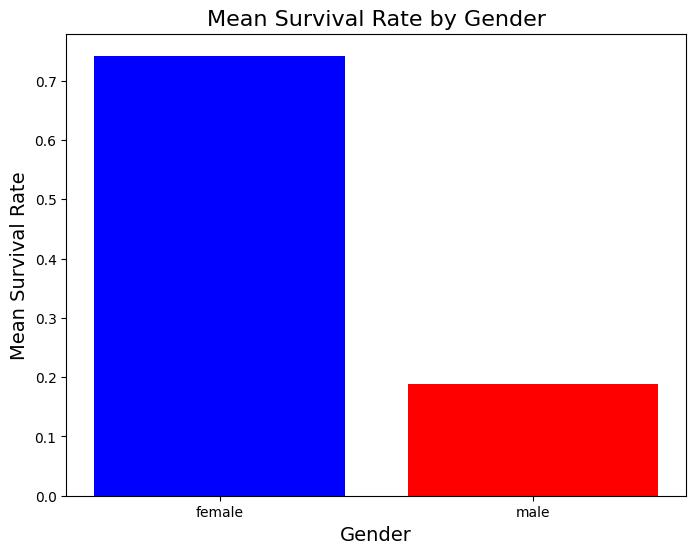

In [52]:
#Problem-4(3.2)
import matplotlib.pyplot as plt
# Group the data by 'Sex' and calculate the mean of 'Survived'
survival_by_gender = df_titanic.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

# Plotting the comparison using a bar plot in Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['blue', 'red'])

# Adding labels and title
plt.title('Mean Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean Survival Rate', fontsize=14)

plt.show()

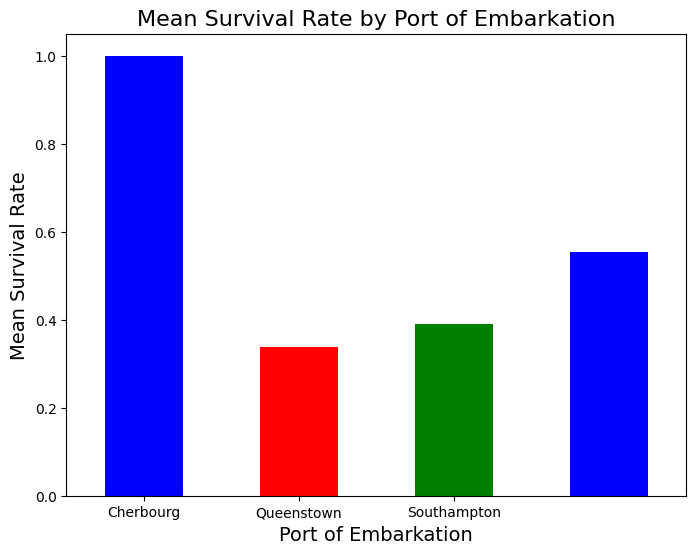

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


In [63]:
#Calculate mean survival rate by port of embarkation (C, Q, S)
survival_by_port = df_titanic.groupby(['Embarked_C', 'Embarked_Q', 'Embarked_S'])['Survived'].mean()

# Plotting the comparison using a bar plot
survival_by_port.plot(kind='bar', figsize=(8, 6), color=['blue', 'red', 'green'])

# Adding labels and title
plt.title('Mean Survival Rate by Port of Embarkation', fontsize=16)
plt.xlabel('Port of Embarkation', fontsize=14)
plt.ylabel('Mean Survival Rate', fontsize=14)
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)

plt.show()
print(df_titanic.head())